파이썬 머신러닝 완벽가이드 ch3.p. 147~174



# 03 평가

분류의 성능평가 지표

- 정확도
- 오차행렬
- 정밀도
- 재현율
- F1스코어
- ROC AUC

## 01 정확도 (Accuracy)

정확도 : 실제 데이터에서 예측 데이터가 얼마나 같은지 판단하는 지표.

정확도 = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수

직관적으로 모델 예측 성능을 나타내지만, 이진분류의 경우 데이터의 구성에 따라 성능 왜곡의 가능성이 있음.

ex) 타이타닉 예제 수행 결과에서, 별다른 알고리즘의 적용 없이 무조건 성별이 여자인 경우 생존으로, 남자인 경우 사망으로 예측해도 높은 정확도

In [1]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
  def fit(self, X, y= None):
    pass
  def predict (self, X):
    pred = np.zeros((X.shape[0],1))
    for i in range (X.shape[0]):
      if X['Sex'].iloc[i]==1:
        pred[i]=0
      else :
        pred[i]=1

    return pred

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
titanic_df=pd.read_csv("/content/drive/MyDrive/데이터/titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
# Cabin값 정리
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))


0    NaN
1      C
2    NaN
Name: Cabin, dtype: object


In [31]:
def get_category(age):
  cat=''
  if age<=1 : cat='Unknown'
  elif age<=5: cat='Baby'
  elif age<= 12: cat='Child'
  elif age<=18: cat='Teenager'
  elif age<=25: cat='Student'
  elif age<=35: cat='Young Adult'
  elif age<=60: cat='Adult'
  else : cat= 'Elderly'

  return cat

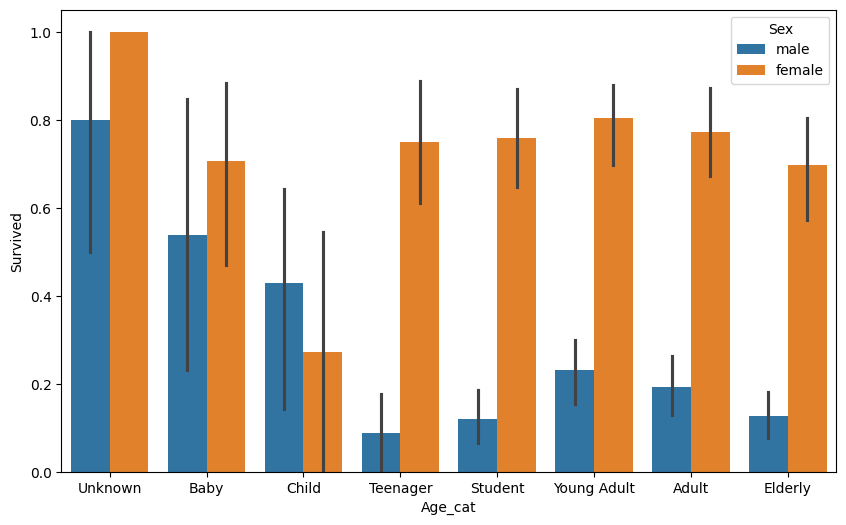

In [32]:
from tokenize import group
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [33]:
# 남은 문자열 카테고리를 숫자형으로 변환

from sklearn import preprocessing

def encode_features(dataDF):
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le=le.fit(dataDF[feature])
    dataDF[feature]=le.transform(dataDF[feature])

  return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,8,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,8,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,8,2


In [34]:
# Null 처리 함수
from sklearn.preprocessing import LabelEncoder

def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

def drop_features(df):
  df.drop(['PassengerId', 'Name','Ticket'], axis=1, inplace=True)
  return df

def format_features(df):
  df['Cabin']= df['Cabin'].str[:1]
  features =['Cabin','Sex','Embarked']
  for feature in features:
    le=LabelEncoder()
    le= le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

def transform_features(df):
  df= fillna(df)
  df=drop_features(df)
  df=format_features(df)
  return df


In [35]:
titanic_df=pd.read_csv("/content/drive/MyDrive/데이터/titanic.csv")


y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived', axis=1)


X_titanic_df =transform_features(X_titanic_df)

X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df,
                                                  test_size=0.2, random_state=0)

In [36]:
import numpy as np
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier 정확도: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier 정확도: 0.7877


이렇게 단순한 알고리즘을 하더라도 데이터의 구성에 따라 높은 정확도가 나올 수 있다. 특히,불균형한 레이블값 분포에서 모델의 성능을 판단할 때 적합한 평가 지표가 아니다.

## 불균형한 MNIST 데이터세트에 정확도지표 적용

모든 데이터를 0으로 예측하는 classifier 이용

In [37]:
# 불균형한 데이터세트와 Dummy Classifier 제작
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
  def fit(self, X, y):
    pass

  def predict(self, X):
    return np.zeros((len(X),1), dtype=bool)

digits=load_digits()

y= (digits.target==7).astype(int)# 7이면 1로, 아니면 0으로 변환
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [38]:
# 불균형한 레이블 분포도 확인
print('레이블 테스트 세트 크기 :',y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 해도 정확도는 :{:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 해도 정확도는 :0.900


예측 정확도가 매우 높다.

따라서 정확도 평가 지표만 가지고 성능 수치로 사용해선 안된다.

## 02 오차행렬

학습된 분류 모델이 예측을 수행하며 얼마나 헷갈리고 있는지 보여주며, 어떠한 유형의 예측오류가 발생하고 있는지를 함께 나타내는 지표이다.

- **TN** : 예측값을 0으로, 실제값도 0
- **FP** : 예측값을 1로, 실제값 0
- **FN** : 예측값을 0으로, 실제값 1
- **TP** : 예측값을 1로, 실제값 1

confusion_matrix() API 제공됨

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

이 값을 조합해 정확도, 정밀도, 재현율 값을 알 수 있다.

정확도 = 예측 결과와 실제 값이 동일한 건수/ 전체 데이터수 = (TN + TP) / (TN + FP +FN+TP)

## 03 정밀도와 재현율

정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가지표이다.

- 정밀도 = TP/ (FP + TP)
예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율.

- 재현율 = TP / (FN + TP)
실제 값이 positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율. 민감도 혹은 TPR이라 부르기도 함.

재현율이 중요 지표인 경우 : 실제 Posivie 데이터를 Negative로 잘못 판단하면 큰 영향이 가는 경우. EX) 암 판단 모델, 보험 사기

정밀도가 중요 지표인 경우 :  스팸메일 판별.

둘다 TP (예측 p, 실제 p) 를 높이는 데에 동일하게 초점을 맞추지만, 정밀도는 FP (예측 p, 실제 n) 을 낮추는 데에, 재현율은 FN (예측 n, 실제 1)을 낮추는 데에 초점을 맞춘다. 따라서 이 둘은 서로 보완적인 지표로서 분류의 성능을 평가하는 데에 적용된다.

가장 좋은 성능 평가는 둘 다 높은 수치를 얻는 것이다.

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('오차행렬')
  print(confusion)
  print('정확도 : {0:.4f}, 정밀도 {1:.4f}, 재현율 :{2:.4f}'.format(accuracy, precision, recall))

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv("/content/drive/MyDrive/데이터/titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[401   4]
 [  2  43]]
정확도 : 0.9867, 정밀도 0.9149, 재현율 :0.9556


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 정밀도 / 재현율 트레이드오프

분류의 결정 임곗값을 조정해 정밀도나 재현율의 수치를 높일 수 있다. 그러나 이 둘은 상호보완적 평가지표이기 때문에 어느 한 쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다.

predict_proba() : 테스트 피처 데이터세트를 파라미털 입력하면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환함.

In [43]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)

print('pred_proba 결과 shape: {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출\n:',pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스값으로 예측\n', pred_proba_result[:3])

pred_proba 결과 shape: (450, 2)
pred_proba array에서 앞 3개만 샘플로 추출
: [[9.99999978e-01 2.21947441e-08]
 [9.78600878e-01 2.13991217e-02]
 [9.99999790e-01 2.10079091e-07]]
두 개의 class 중에서 더 큰 확률을 클래스값으로 예측
 [[9.99999978e-01 2.21947441e-08 0.00000000e+00]
 [9.78600878e-01 2.13991217e-02 0.00000000e+00]
 [9.99999790e-01 2.10079091e-07 0.00000000e+00]]


사이킷런의 predict()는 predict_proba() 메서드가 반환하는 확률값을, 정해진 임곗값을 만족하는 ndarray의 칼럼위치를 최종예측 클래스로 결정한다.

In [44]:
# Binarizer
from sklearn.preprocessing import Binarizer

X=[[1,-1,2],
   [2,0,0],
   [0,1.1, 1.2]]

binarizer= Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


1.1보다 같거나 작으면 0, 크면 1로 변환된다.

In [45]:
# 임곗값 0.5
from sklearn.preprocessing import Binarizer

custom_threshold=0.5
pred_proba_1 = pred_proba[:,1].reshape(-1,1) # positive 칼럼 하나만 추출해 Binarizer 적용

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict= binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[401   4]
 [  2  43]]
정확도 : 0.9867, 정밀도 0.9149, 재현율 :0.9556


앞 예제와 정확히 동일한 결과 출력.

In [46]:
# 임곗값 0.4
custom_threshold=0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1) # positive 칼럼 하나만 추출해 Binarizer 적용

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict= binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[400   5]
 [  2  43]]
정확도 : 0.9844, 정밀도 0.8958, 재현율 :0.9556


임곗값을 낮추니 재현율이 올라가고 정밀도가 떨어진다.

임곗값을 낮출수록 True비율이 많아지게 되는데, 양성 예측이 늘다보니 실제 양성을 음성으로 예측하는 횟수가 상대적으로 줄어들게 되므로 재현율 값이 올라가게 된다.

이때 FP가 증가하며 정밀도가 많이 나빠지게 된다.

In [47]:
# 임곗값을 0.05씩 증가시키며 조사하기 위해 함수 작성
thresholds=[0.4, 0.45,0.5,0.55, 0.6 ]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  # thresholds list 객체 내의 값을 차례로 iteration하며 Evaluation 수행
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값:', custom_threshold)
    get_clf_eval(y_test, custom_predict)


get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차행렬
[[400   5]
 [  2  43]]
정확도 : 0.9844, 정밀도 0.8958, 재현율 :0.9556
임곗값: 0.45
오차행렬
[[401   4]
 [  2  43]]
정확도 : 0.9867, 정밀도 0.9149, 재현율 :0.9556
임곗값: 0.5
오차행렬
[[401   4]
 [  2  43]]
정확도 : 0.9867, 정밀도 0.9149, 재현율 :0.9556
임곗값: 0.55
오차행렬
[[401   4]
 [  2  43]]
정확도 : 0.9867, 정밀도 0.9149, 재현율 :0.9556
임곗값: 0.6
오차행렬
[[401   4]
 [  2  43]]
정확도 : 0.9867, 정밀도 0.9149, 재현율 :0.9556


임곗값 변화에 따른 평가 지표 값을 알아보는 API :

**precision_recall_curve()**

- 입력 파라미터 :

y_true : 실제 클래스값 배열

probas_pred : positive 칼럼의 예측 확률 배열

- 반환 값

정밀도 : 임곗값 별 정밀도 값을 배열로 반환

재현율 : 임곗값 별 재현율 값을 배열로 반환

In [48]:
# 샘플로 10건만 추출하되, 임곗값을 15단계로 추출

from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일때의 예측 확률을 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 shape: ', thresholds.shape)

# 반환된 임계값 배열 로우가 147건, 샘플로 10건만 추출, 임곗값 15 step
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개: ',thr_index)
print('샘플용 10개의 임곗값 :', np.round(thresholds[thr_index],2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도:', np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 shape:  (450,)
샘플 추출을 위한 임계값 배열의 index 10개:  [  0  15  30  45  60  75  90 105 120 135 150 165 180 195 210 225 240 255
 270 285 300 315 330 345 360 375 390 405 420 435]
샘플용 10개의 임곗값 : [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.93
 1.   1.  ]
샘플 임계값별 정밀도: [0.1   0.103 0.107 0.111 0.115 0.12  0.125 0.13  0.136 0.143 0.15  0.158
 0.167 0.176 0.188 0.2   0.214 0.231 0.25  0.273 0.3   0.333 0.375 0.429
 0.5   0.587 0.733 0.956 1.    1.   ]
샘플 임계값별 재현율: [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    0.978 0.978 0.956 0.667 0.333]


임곗값이 증가할수록 정밀도 값은 동시에 높아지지만 재현율 값은 낮아진다.

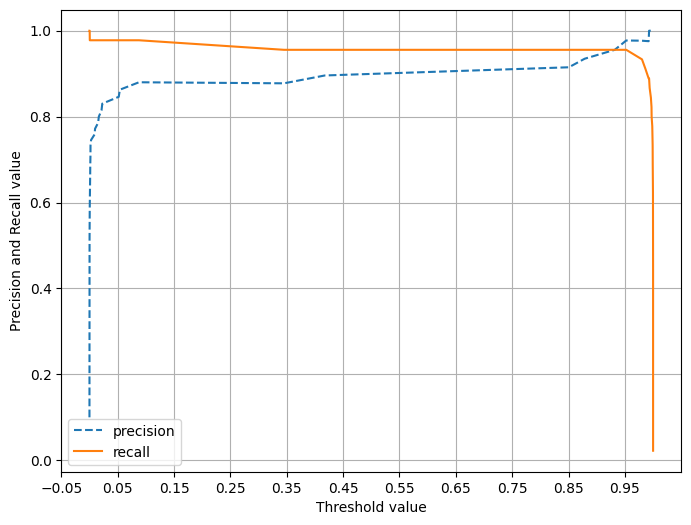

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import numpy as np

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    plt.figure(figsize=(8,6))
    plt.plot(thresholds, precisions[:-1], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:-1], label='recall')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

# 데이터는 타이타닉 데이터
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

## 정밀도와 재현율의 맹점

- **정밀도가 100%가 되는 방법**

확실한 경우만 P로 예측하고 나머지를 N으로 예측한다. 이러면 FP=0으로 정밀도= TP/(TP+FP) =1 이 된다.

- **재현율이 100%가 되는 방법**

모든 환자를 P로 예측하면 된다. TN은 수치에 포함되지 않고, FN은 0이므로 재현율 = TP/(TP+FN)은 100%가 된다.

정밀도와 재현율의 수치가 적절히 조합되어 분류의 종합적인 성능 평가에 사용될 수 있는 평가 지표가 필요하다.

## F1 스코어

정밀도와 재현율을 결합한 지표, 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 지님.

F1 = 2/(1/recall + 1/precision)

**f1_score() API 활용**

In [54]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.9348


In [55]:
# 임곗값을 변화시키면서 평가지표를 구해보자

def get_clf_eval(y_test, pred):
  confusion= confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)

  f1 = f1_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도:{1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

thresholds =[0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba=lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[400   5]
 [  2  43]]
정확도: 0.9844, 정밀도:0.8958, 재현율: 0.9556, F1: 0.9247
임곗값: 0.45
오차 행렬
[[401   4]
 [  2  43]]
정확도: 0.9867, 정밀도:0.9149, 재현율: 0.9556, F1: 0.9348
임곗값: 0.5
오차 행렬
[[401   4]
 [  2  43]]
정확도: 0.9867, 정밀도:0.9149, 재현율: 0.9556, F1: 0.9348
임곗값: 0.55
오차 행렬
[[401   4]
 [  2  43]]
정확도: 0.9867, 정밀도:0.9149, 재현율: 0.9556, F1: 0.9348
임곗값: 0.6
오차 행렬
[[401   4]
 [  2  43]]
정확도: 0.9867, 정밀도:0.9149, 재현율: 0.9556, F1: 0.9348


## ROC 곡선과 AUC

ROC곡선은 수신자 판단 곡선으로, FPR이 변할 때 TPR이 어떻게 변하는 지를 나타내는 곡선이다.

TPR은 재현율이자 민감도로, 실제 양성이 정확히 예측되어야하는 수준을 나타낸다.

TNR은 특이성으로 실제 음성이 정확히 예측되어야 하는 수준을 나타낸다.

FPR = FP / (FP+TN) = 1- TNR= 1- 특이성

roc_curve() API 활용

In [56]:
from sklearn.metrics import roc_curve

# 레이블값이 1일때 예측 확률 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds= roc_curve(y_test, pred_proba_class1)
thr_index = np.arange(1, thresholds.shape[0], 5)

print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값 :', np.round(thresholds[thr_index],2))

print('샘플 임곗값 별 FPR:', np.round(fprs[thr_index],3))
print('샘플 임곗값 별 TPR:', np.round(tprs[thr_index],3))

샘플 추출을 위한 임곗값 배열의 index 10개: [1 6]
샘플용 10개의 임곗값 : [1.   0.09]
샘플 임곗값 별 FPR: [0.    0.015]
샘플 임곗값 별 TPR: [0.022 0.978]


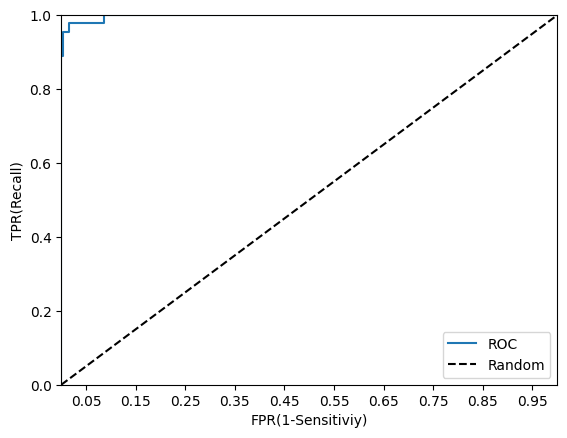

In [57]:
def roc_curve_plot(y_test, pred_proba_c1):
  fprs, tprs, thresholds= roc_curve(y_test, pred_proba_c1)
  plt.plot(fprs, tprs, label='ROC')
  plt.plot([0,1],[0,1],'k--', label='Random')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))
  plt.xlim(0,1); plt.ylim(0,1)
  plt.xlabel('FPR(1-Sensitiviy)'); plt.ylabel('TPR(Recall)')
  plt.legend()

roc_curve_plot(y_test, pred_proba[:,1])

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

print(confusion_matrix(y_target, preds))
print('정확도:', np.round(accuracy_score(y_target, preds),4))
print('정밀도:', np.round(precision_score(y_target, preds),4))
print('재현율:', np.round(recall_score(y_target, preds),4))

NameError: name 'y_target' is not defined

In [60]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)

  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))